# Logistic Regression

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal as normal
from scipy.linalg import pinv as inv
from sklearn.preprocessing import PolynomialFeatures

cor = ['#fad390', '#f6b93b', '#fa983a', '#e58e26', '#f8c291', '#e55039', '#eb2f06', '#b71540']
cog = ['#b8e994', '#78e08f', '#38ada9', '#079992']
cob = ['#6a89cc', '#4a69bd', '#1e3799', '#0c2461', '#82ccdd', '#60a3bc', '#3c6382', '#0a3d62']

---
* Goal: Implement Logistic Regression for a "double moon" with a polynomial basis function.
* Details:
    1. Bishop, PRML, Chapter 4.
    2. [Logistic Regression (Wikipedia)](https://en.wikipedia.org/wiki/Logistic_regression).
    
---

(SGD) Error after 49 timesteps: 5.31


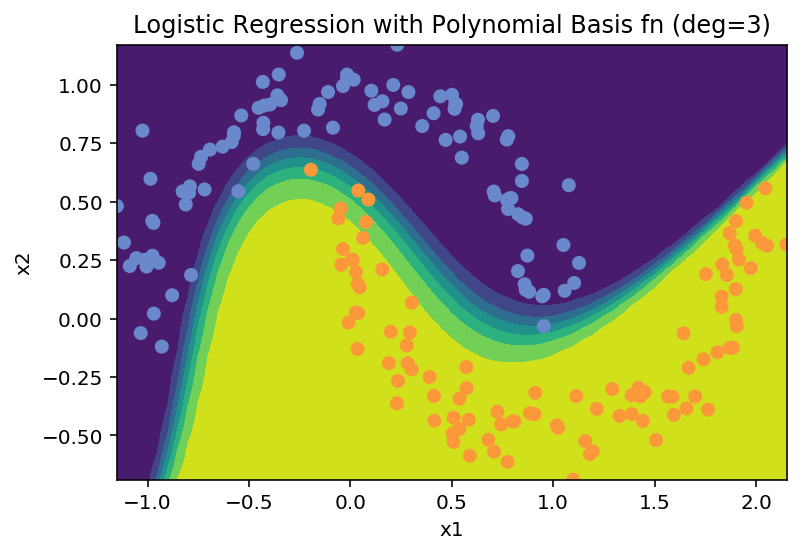

In [2]:
# Generate double moon dataset
n, noise = 100, 0.1
outer_circ_x = np.cos(np.linspace(0, np.pi, n))
outer_circ_y = np.sin(np.linspace(0, np.pi, n))
inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n))
inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n)) - .5

D = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
t = np.hstack([np.zeros(n, dtype=np.intp),
               np.ones(n, dtype=np.intp)])
D += np.random.normal(scale=noise, size=D.shape)
D = np.concatenate((D, t[:,None]), axis=1)
np.random.shuffle(D)
x, y, t = D[:,0], D[:,1], D[:,2,None]
x_space = np.linspace(np.min(x),np.max(x),2)

def append_one(x): return np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
def sigmoid(X):    return 1/(1+np.exp(-X))

def polynomial_basis_fn(D, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(D)

poly_deg=3
phi_D = polynomial_basis_fn(D[:,:2],poly_deg)

# initialise weights
w = np.random.uniform(0,1,phi_D.shape[1])[None,].T

# Logistic regression algorithm
eta = 0.1
eps=10e-6
iterations = 50
for n in range(iterations):
    yh = sigmoid(phi_D @ w)
    yh = np.clip(yh, a_min=eps, a_max=1-eps) # for stability
    w -= eta * ((yh-t).T @ phi_D).T
    error = -(t.T @ np.log(yh) + (1-t).T @ np.log(1-yh))

print(f'(SGD) Error after {n} timesteps: {error[0][0]:.2f}')

g1, g2 = np.meshgrid(np.arange(np.min(x),np.max(x)+0.06, 0.05), np.arange(np.min(y),np.max(y)+0.06, 0.05))
g = np.c_[g1.ravel(), g2.ravel()]
g = polynomial_basis_fn(g,poly_deg)

g_pred = (sigmoid(g @ w)).reshape(*g1.shape)
#g_pred[g_pred<0.5] = 0 # hard threshold
#g_pred[g_pred>0.5] = 1
plt.title('Logistic Regression with Polynomial Basis fn (deg={})'.format(poly_deg))
plt.contourf(g1, g2, g_pred)
plt.scatter(x,y, c=[cor[2] if x == 1 else cob[0] for x in t])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(np.min(x),np.max(x))
plt.ylim(np.min(y),np.max(y));